In [119]:
import pandas as pd
import numpy as np

X_train = np.loadtxt('X_train.txt', delimiter=' ')
Y_train = np.loadtxt('y_train.txt')

X_test = np.loadtxt('X_test.txt', delimiter=' ')
Y_test = np.loadtxt('y_test.txt')

print(Y_test)

[5. 5. 5. ... 2. 2. 2.]


In [2]:
global svm_pred
global knn_pred
global dt_pred
global rf_pred

In [3]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def build_classifiers(x_train, y_train):
        result = {}
        lsvm_clf = svm.SVC()
        lsvm_clf.fit(X_train,Y_train)
        result['svm'] = lsvm_clf
        
        knn_clf = KNeighborsClassifier()
        knn_clf.fit(X_train, Y_train)
        result['knn'] = knn_clf
        
        dtc_clf = DecisionTreeClassifier()
        dtc_clf = dtc_clf.fit(X_train,Y_train)
        result['dtc'] = dtc_clf
        
        crf_clf = RandomForestClassifier()
        crf_clf.fit(X_train, Y_train)
        result['rf'] = crf_clf
        return result
    
classifiers = build_classifiers(X_train, Y_train)

In [4]:
def build_predictions(classifiers, x_test):
    result = {}
    for classifier in classifiers:
        result[classifier] = classifiers[classifier].predict(x_test)
    return result

predictions = build_predictions(classifiers, X_test)

In [10]:
import matplotlib.pyplot as plt
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn

def show_confusion_matrix(name, y_test, y_pred):
    print(name,' confusion matrix:')
    cm = confusion_matrix(y_test, y_pred)
    seaborn.set(font_scale=1.4)
    seaborn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.show()

svm  confusion matrix:


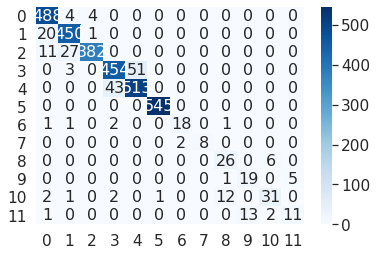

knn  confusion matrix:


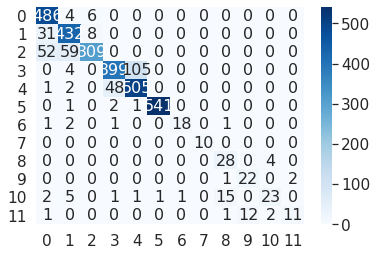

In [11]:
show_confusion_matrix('svm',Y_test, predictions['svm'])
show_confusion_matrix('knn',Y_test, predictions['knn'])

dtc  confusion matrix:


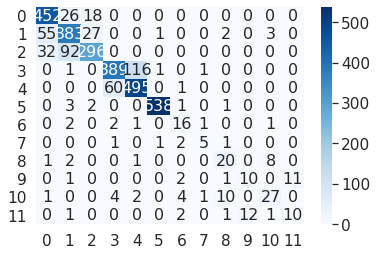

rf  confusion matrix:


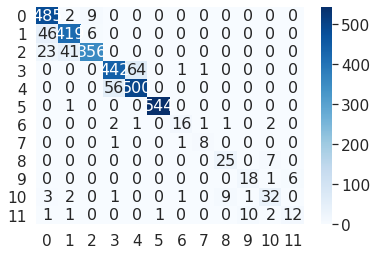

In [12]:
show_confusion_matrix('dtc',Y_test, predictions['dtc'])
show_confusion_matrix('rf',Y_test, predictions['rf'])

In [13]:
#ACC - accurancy score
from sklearn.metrics import accuracy_score

for pred in predictions:
    print("{} accuracy: {}".format(pred, accuracy_score(Y_test, predictions[pred])))

svm accuracy: 0.9313725490196079
knn accuracy: 0.8804554079696395
dtc accuracy: 0.8352308665401644
rf accuracy: 0.9035420619860848


In [14]:
# recall score
from sklearn.metrics import recall_score

def show_recall_score(average='micro'):
    print('\nrecall score for average: ', average)
    for pred in predictions:
        print("{} recall: {}".format(pred, recall_score(Y_test, predictions[pred], average=average)))
    

show_recall_score()
show_recall_score('macro')


recall score for average:  micro
svm recall: 0.9313725490196079
knn recall: 0.8804554079696395
dtc recall: 0.8352308665401644
rf recall: 0.9035420619860848

recall score for average:  macro
svm recall: 0.8216950510161535
knn recall: 0.811126775700204
dtc recall: 0.6845375355271258
rf recall: 0.7980808772829683


In [15]:
# f1 score
from sklearn.metrics import f1_score

def show_f1_score(average='micro'):
    print('\nf1 score for average: ', average)
    for pred in predictions:
        print("{} f1 score: {}".format(pred, f1_score(Y_test, predictions[pred], average=average)))
    

show_f1_score()
show_f1_score('macro')


f1 score for average:  micro
svm f1 score: 0.9313725490196079
knn f1 score: 0.8804554079696395
dtc f1 score: 0.8352308665401644
rf f1 score: 0.9035420619860848

f1 score for average:  macro
svm f1 score: 0.8325977535631431
knn f1 score: 0.8145539889084653
dtc f1 score: 0.6909274914370312
rf f1 score: 0.8063827051361684


In [16]:
# AUC score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

def show_roc_auc_score():
    for pred in predictions:
        print("{} AUC score: {}".format(pred, multiclass_roc_auc_score(Y_test, predictions[pred])))
    

show_roc_auc_score()

svm AUC score: 0.9075387757925567
knn AUC score: 0.8997207948113851
dtc AUC score: 0.834271871255026
rf AUC score: 0.8943608465188798


In [17]:
#model selection
from sklearn.model_selection import cross_val_score

def build_cross_val_scores(classifiers, x_train,y_train):
    result = {}
    for classificator in classifiers:
        result[classificator] = cross_val_score(classifiers[classificator], x_train, y_train, cv=5)
        print(classificator, 'score :', result[classificator])
    return result

scores = build_cross_val_scores(classifiers, X_train, Y_train)

svm score : [0.93724859 0.92196299 0.85518906 0.92914654 0.92351047]
knn score : [0.88012872 0.86323411 0.78921963 0.88888889 0.87520129]
dtc score : [0.85840708 0.82944489 0.77634755 0.81803543 0.75362319]
rf score : [0.89702333 0.9082864  0.845535   0.90338164 0.86151369]


In [18]:
#avg cross val score classification:
print('Classification by average:')
avg_results = {
    'svm':np.mean(scores['svm']),
    'knn':np.mean(scores['knn']),
    'dtc':np.mean(scores['dtc']),
    'rf':np.mean(scores['rf'])
}
print(avg_results)
print('Best result: ', max(avg_results, key=avg_results.get))

Classification by average:
{'svm': 0.9134115296870202, 'knn': 0.8593345277839314, 'dtc': 0.8071716264867478, 'rf': 0.8831480121206938}
Best result:  svm


In [19]:
#std cross val score classification:
print('Classification by standard deviation along the scores:')
std_results = {
    'svm':np.std(scores['svm']),
    'knn':np.std(scores['knn']),
    'dtc':np.std(scores['dtc']),
    'rf':np.std(scores['rf'])
}
print(std_results)
print('Best result: ', min(std_results, key=std_results.get))

Classification by standard deviation along the scores:
{'svm': 0.029599892589850428, 'knn': 0.03602476499129995, 'dtc': 0.037567941888018694, 'rf': 0.024966561570629063}
Best result:  rf


In [ ]:
#svm seems best choice by far

In [56]:
def check_svm_clfs(X_train, Y_train, X_test, Y_test):
    c_values = [1, 10, 50, 5000, 10000]
    for val in c_values:
        clf = svm.SVC(C=val)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)
        print("{} f1 score: {}".format(val, f1_score(Y_test, pred, average='micro')))

check_svm_clfs(X_train, Y_train, X_test, Y_test)

1 f1 score: 0.9313725490196079
10 f1 score: 0.9459203036053131
50 f1 score: 0.948134092346616
5000 f1 score: 0.9487666034155597
10000 f1 score: 0.9487666034155597


In [59]:
def check_svm_clfs_kernels(X_train, Y_train, X_test, Y_test):
    kernels = ['poly', 'sigmoid']
    poly_degs = [3,10,15]
    for val in kernels:
        clf = svm.SVC(C=5000, kernel=val)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)
        print("{} f1 score: {}".format(val, f1_score(Y_test, pred, average='micro')))

check_svm_clfs_kernels(X_train, Y_train, X_test, Y_test)

poly f1 score: 0.9509803921568627
sigmoid f1 score: 0.7798861480075902


In [63]:
def check_svm_clfs_kernels_deg(X_train, Y_train, X_test, Y_test):
    poly_degs = [2,4,5,10,15]
    for val in poly_degs:
        clf = svm.SVC(C=5000, kernel='poly', degree=val)
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)
        print("{} f1 score: {}".format(val, f1_score(Y_test, pred, average='micro')))

check_svm_clfs_kernels_deg(X_train, Y_train, X_test, Y_test)

2 f1 score: 0.9383301707779885
4 f1 score: 0.9471853257432005
5 f1 score: 0.9487666034155597
10 f1 score: 0.9320050600885516
15 f1 score: 0.9101834282099937


In [64]:
def check_svm_clfs_kernels_deg(X_train, Y_train, X_test, Y_test):
    poly_degs = [2,4,5,10,15]
    c_values = [1, 10, 5000, 10000]
    for val in c_values:
        for poly_val in poly_degs:
            clf = svm.SVC(C=val, kernel='poly', degree=poly_val)
            clf.fit(X_train,Y_train)
            pred = clf.predict(X_test)
            print("{}:{} f1 score: {}".format(val, poly_val, f1_score(Y_test, pred, average='micro')))

check_svm_clfs_kernels_deg(X_train, Y_train, X_test, Y_test)

1:2 f1 score: 0.9383301707779885
1:4 f1 score: 0.9471853257432005
1:5 f1 score: 0.9487666034155597
1:10 f1 score: 0.9320050600885516
1:15 f1 score: 0.9101834282099937
10:2 f1 score: 0.946236559139785
10:4 f1 score: 0.9506641366223909
10:5 f1 score: 0.9475015812776724
10:10 f1 score: 0.9320050600885516
10:15 f1 score: 0.9108159392789373
5000:2 f1 score: 0.9509803921568627
5000:4 f1 score: 0.9500316255534472
5000:5 f1 score: 0.9475015812776724
5000:10 f1 score: 0.9316888045540797
5000:15 f1 score: 0.9133459835547122
10000:2 f1 score: 0.9509803921568627
10000:4 f1 score: 0.9500316255534472
10000:5 f1 score: 0.9475015812776724
10000:10 f1 score: 0.9316888045540797
10000:15 f1 score: 0.9133459835547122


In [121]:
#best parameters are C=5000, kernel='poly', degree=2
predictions_test = {}
clf = svm.SVC(C=5000, kernel='poly', degree=2)
clf.fit(X_train,Y_train)
predictions['svm++'] = clf.predict(X_train)
predictions_test['svm++'] = clf.predict(X_test)

clf = svm.SVC()
clf.fit(X_train,Y_train)
predictions_test['svm'] = clf.predict(X_test)

In [122]:
print(X_train.shape)
print(len(predictions['svm++']))
print(X_test.shape)
print(len(predictions_test['svm++']))

(7767, 561)
7767
(3162, 561)
3162


svm  confusion matrix:


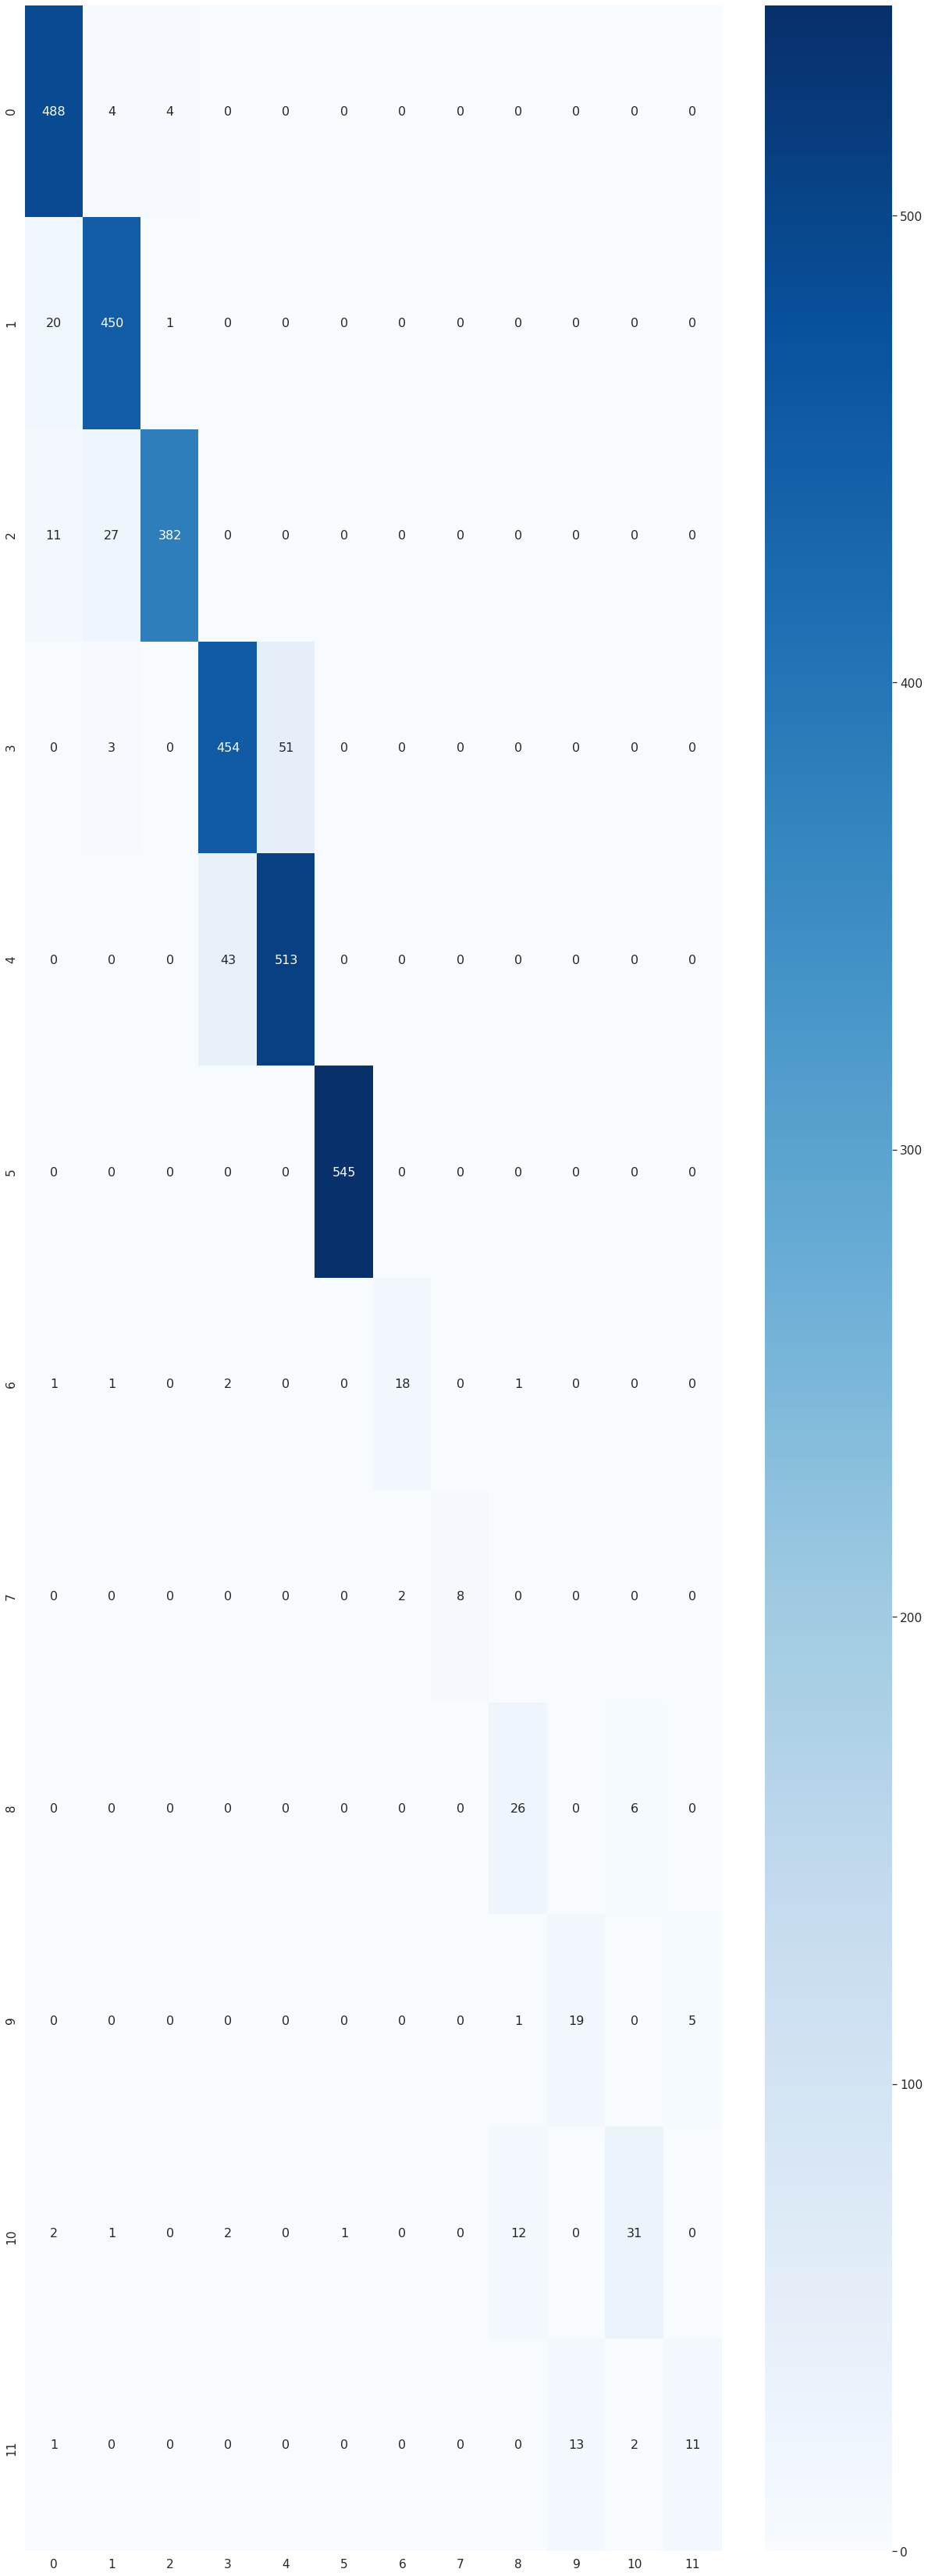

svm++  confusion matrix:


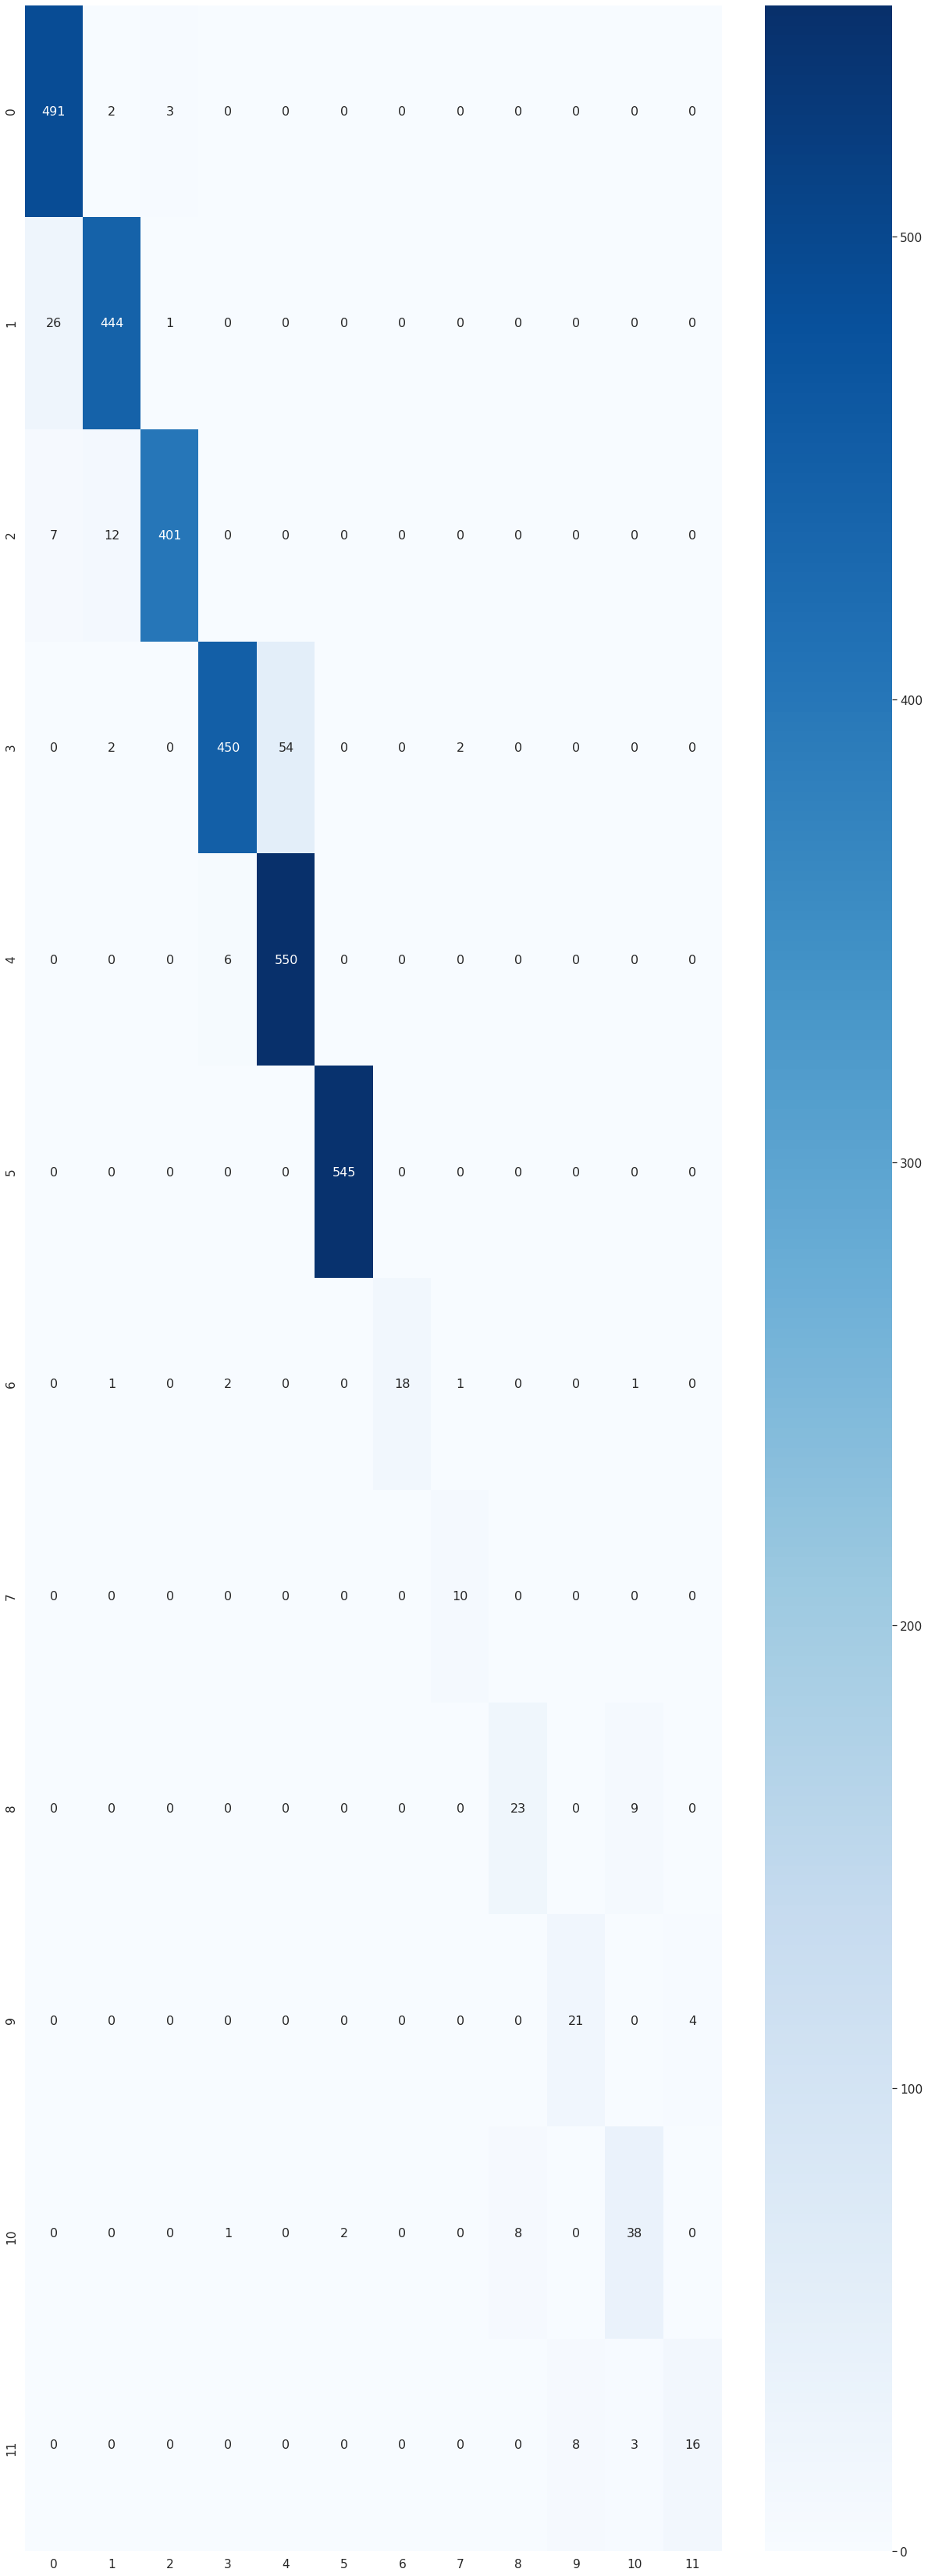

In [112]:
show_confusion_matrix('svm',Y_test, predictions_test['svm'])
show_confusion_matrix('svm++',Y_test, predictions_test['svm++'])

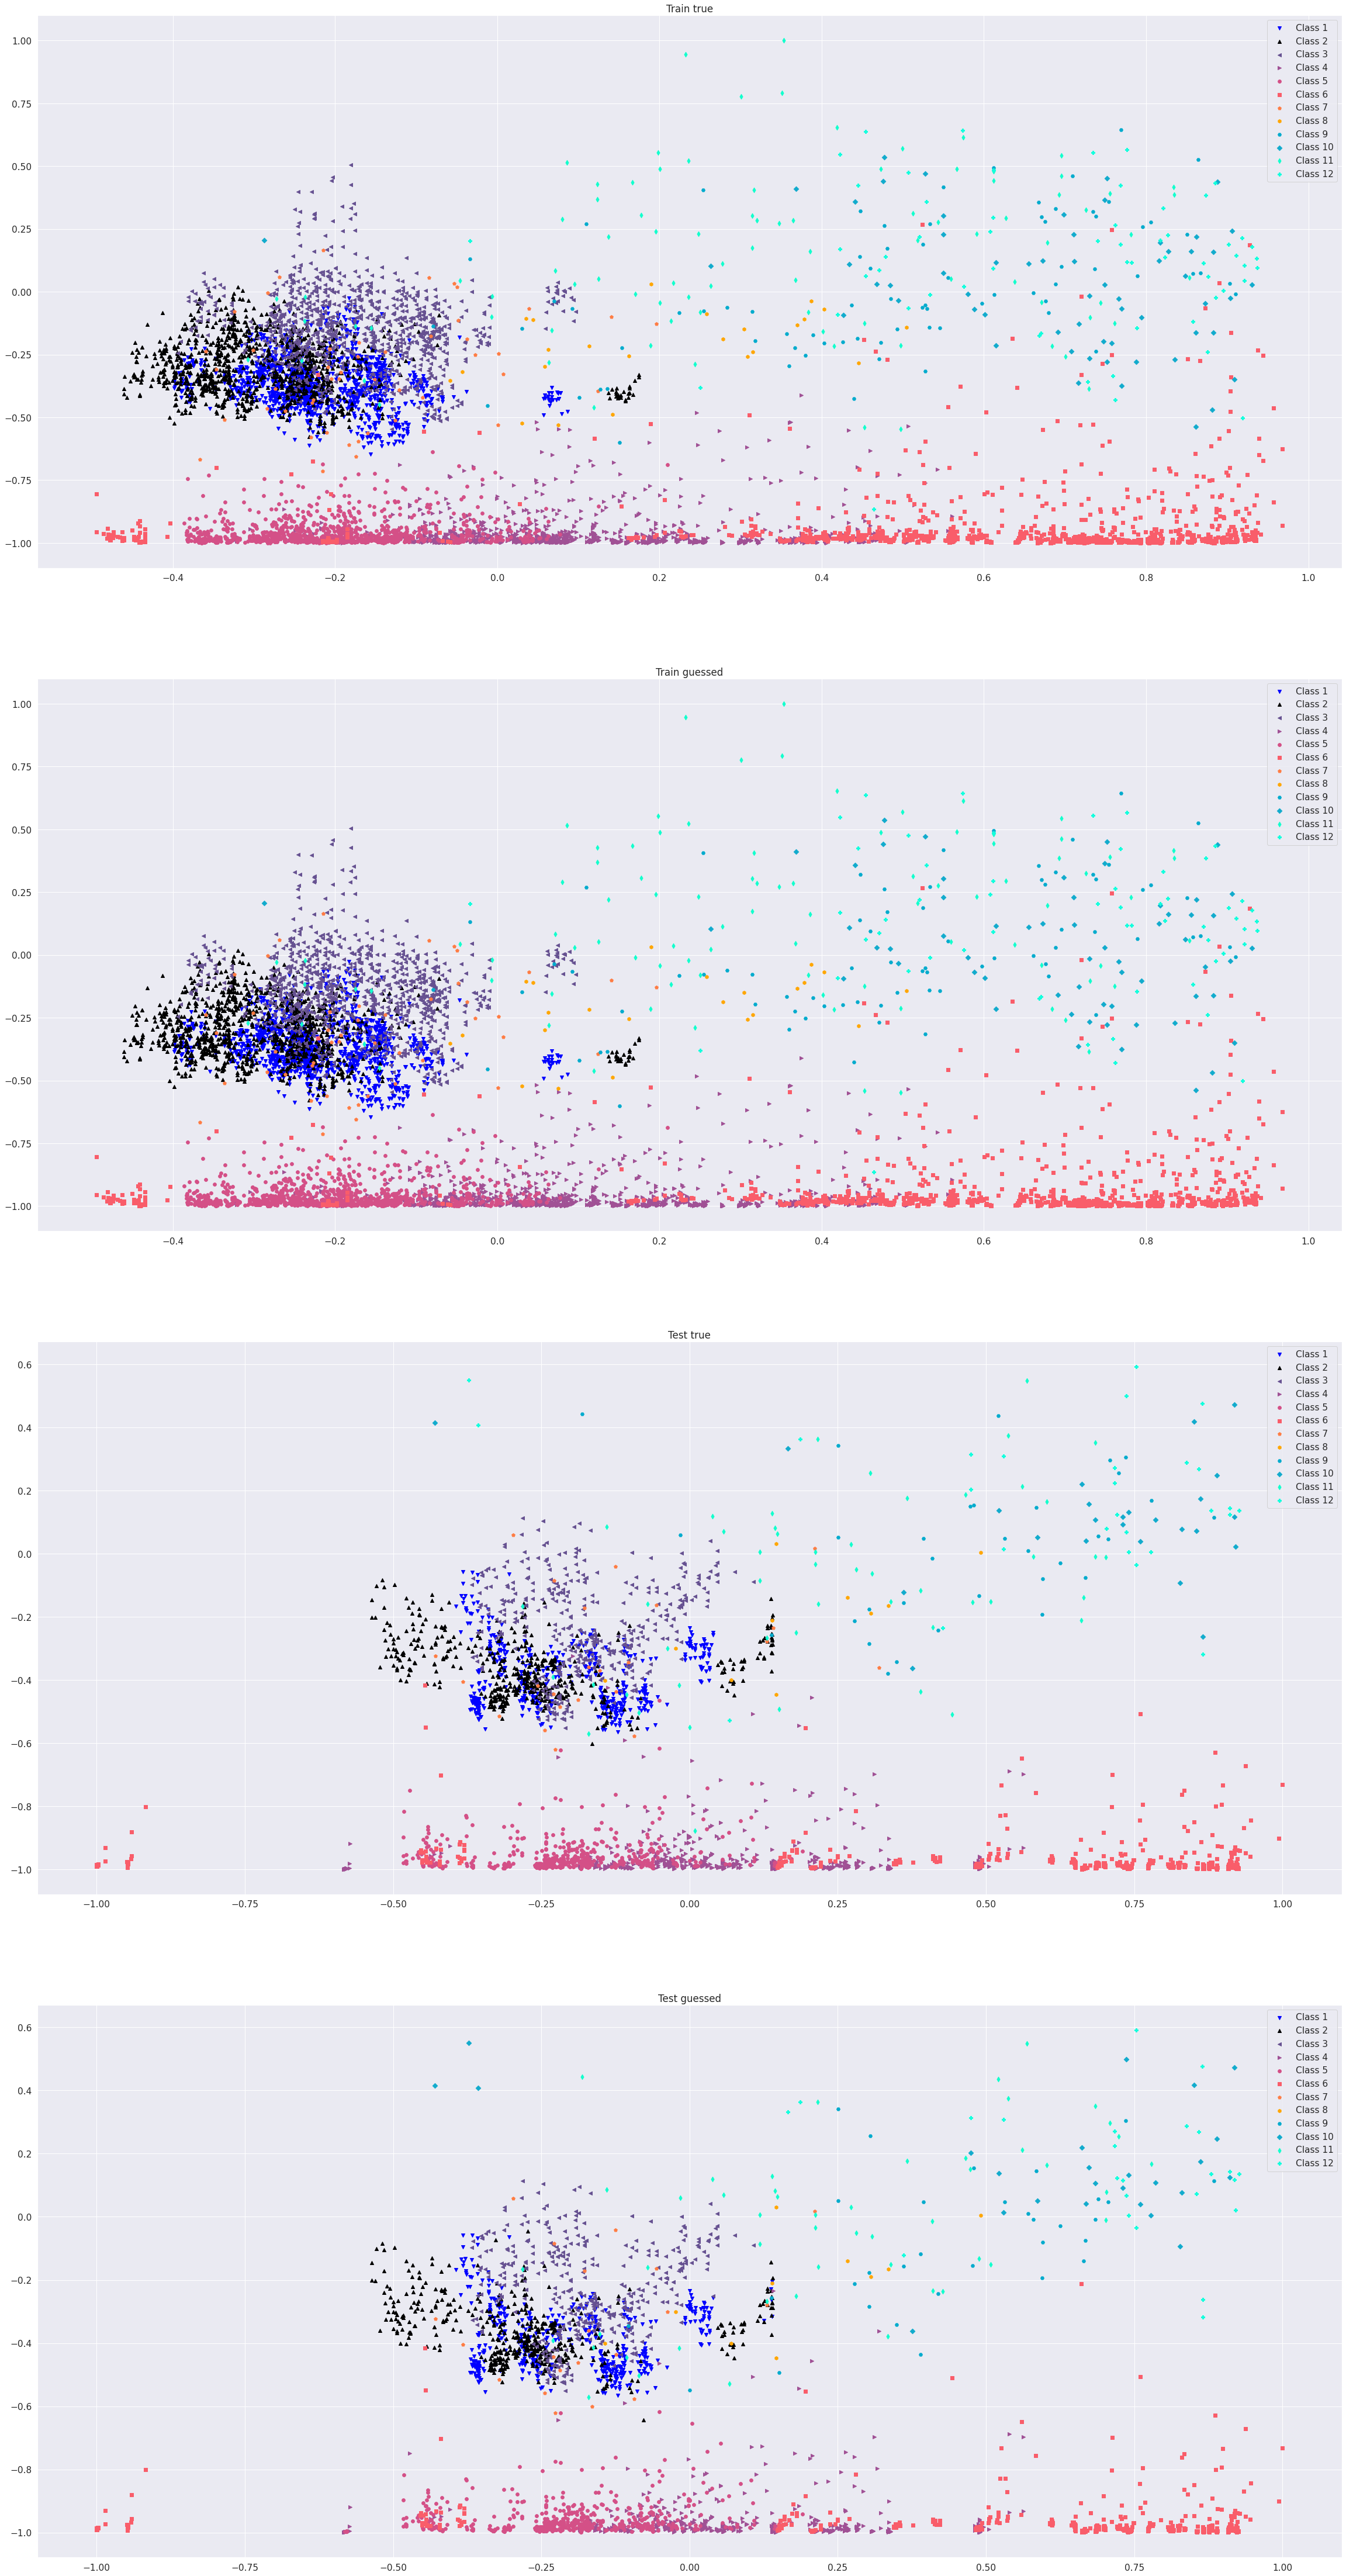

In [128]:
def print_result_by_col(ax, col_a, col_b, data):
    colorList = [
        'green',
        'blue',
        'black',
        '#665191',
        '#a05195',
        '#d45087',
        '#f95d6a',
        '#ff7c43',
        '#ffa600',
        '#00abcd',
        '#12abcd',
        '#12FFcd',
        '#12FFDD',
    ]
    symbolList = [
        'o', 'v', '^', '<', '>', '8', 's', 'p', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^'
    ]
    for i in set(data['class']):
        i = int(i)
        pred = data['class'] == i
        ax.scatter(data[data.columns[col_a]][pred], data[data.columns[col_b]][pred], c=colorList[i], marker=symbolList[i], label='Class {}'.format(i))
    ax.legend()



fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
col_a, col_b = 50, 200

#train true
data = pd.read_csv(filepath_or_buffer='X_train.txt', header=None, sep=' ')
true_answers = pd.read_csv(filepath_or_buffer='y_train.txt', header=None, sep=' ')
data['class'] = true_answers

print_result_by_col(ax1, col_a, col_b, data)
ax1.set_title('Train true')

#train guessed

data['class'] = predictions['svm++']

print_result_by_col(ax2, col_a, col_b, data)
ax2.set_title('Train guessed')

#test true
data = pd.read_csv(filepath_or_buffer='X_test.txt', header=None, sep=' ')
true_answers = pd.read_csv(filepath_or_buffer='y_test.txt', header=None, sep=' ')
data['class'] = true_answers

print_result_by_col(ax3, col_a, col_b, data)
ax3.set_title('Test true')

#test guessed
data['class'] = predictions_test['svm++']

print_result_by_col(ax4, col_a, col_b, data)
ax4.set_title('Test guessed')

#plt.rcParams["figure.figsize"]=20,80
plt.show()